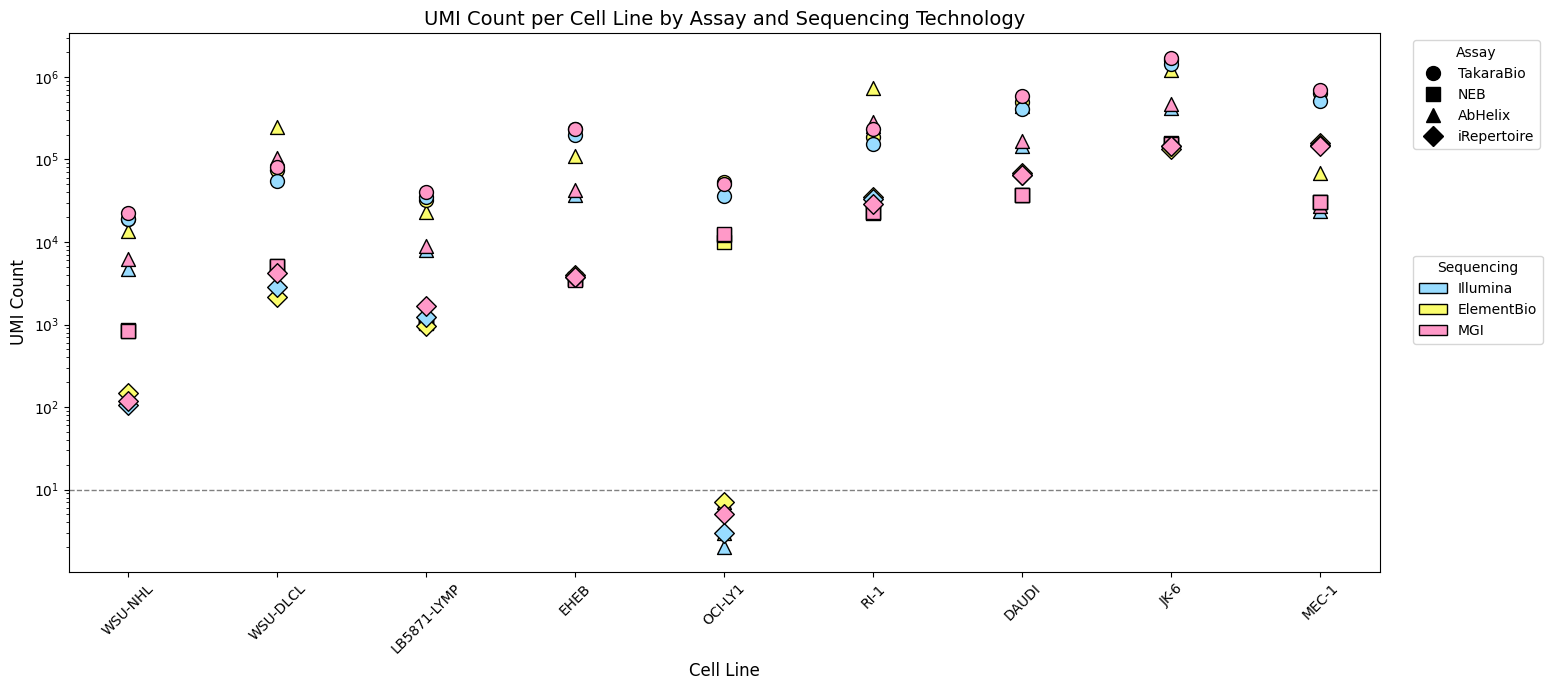

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Define raw data
raw_data = [
    ['TakaraBio', 'Illumina', 19108, 55203, 34678, 199075, 35845, 151926, 408401, 1441858, 505145],
    ['TakaraBio', 'ElementBio', 18798, 74246, 32620, 235582, 54087, 186565, 495206, 1602594, 634244],
    ['TakaraBio', 'MGI', 22578, 81688, 40343, 235217, 50735, 232523, 589519, 1707403, 687786],
    ['NEB', 'Illumina', 869, 5127, 1106, 3579, 12064, 22908, 37307, 159697, 30666],
    ['NEB', 'ElementBio', 834, 5025, 1032, 3521, 10048, 22443, 37079, 154356, 30358],
    ['NEB', 'MGI', 845, 5114, 1059, 3499, 12369, 22812, 37369, 154740, 30362],
    ['AbHelix', 'Illumina', 4671, 91150, 7901, 36700, 2, 251202, 147477, 415476, 24013],
    ['AbHelix', 'ElementBio', 13680, 247751, 23186, 110165, 3, 729803, 443247, 1204972, 68511],
    ['AbHelix', 'MGI', 6254, 105276, 8858, 42398, 7, 281321, 166891, 473859, 27321],
    ['iRepertoire', 'Illumina', 107, 2838, 1231, 3765, 3, 32995, 65758, 146045, 151924],
    ['iRepertoire', 'ElementBio', 148, 2142, 948, 3960, 7, 34761, 67750, 134959, 156590],
    ['iRepertoire', 'MGI', 119, 4204, 1656, 3763, 5, 28940, 64791, 146109, 145902],
]

# Column labels
columns = ['Assay', 'Platform', 'WSU-NHL', 'WSU-DLCL', 'LB5871-LYMP', 'EHEB',
           'OCI-LY1', 'RI-1', 'DAUDI', 'JK-6', 'MEC-1']
df = pd.DataFrame(raw_data, columns=columns)

# Reshape to long-form
df_long = df.melt(id_vars=['Assay', 'Platform'], var_name='CellLine', value_name='UMI_Count')

# Define color and shape mappings
colors = {
    'Illumina': '#98dcff',
    'ElementBio': '#fbfd6c',
    'MGI': '#ff99c8'
}
markers = {
    'TakaraBio': 'o',
    'NEB': 's',
    'AbHelix': '^',
    'iRepertoire': 'D'
}

# Create plot
plt.figure(figsize=(14, 7))

# Scatter plot
for (assay, platform), group in df_long.groupby(['Assay', 'Platform']):
    plt.scatter(
        group['CellLine'],
        group['UMI_Count'],
        color=colors[platform],
        marker=markers[assay],
        label=f'{assay}-{platform}',  # won't be used for legend directly
        s=100,
        edgecolor='black'
    )

# Reference line
plt.axhline(y=10, color='gray', linestyle='--', linewidth=1)

# Axis labels and title
plt.xlabel('Cell Line', fontsize=12)
plt.ylabel('UMI Count', fontsize=12)
plt.title('UMI Count per Cell Line by Assay and Sequencing Technology', fontsize=14)
plt.xticks(rotation=45)
plt.yscale('log')  # Recommended due to wide range
plt.tight_layout()

# Build legend elements manually

# Platform legend (color only)
platform_legend = [
    Patch(facecolor=color, edgecolor='black', label=platform)
    for platform, color in colors.items()
]

# Assay legend (shape only)
assay_legend = [
    Line2D([0], [0], marker=marker, color='black', linestyle='None', markersize=10, label=assay)
    for assay, marker in markers.items()
]

# Add legends separately
legend1 = plt.legend(handles=assay_legend, title='Assay', loc='upper left', bbox_to_anchor=(1.02, 1))
legend2 = plt.legend(handles=platform_legend, title='Sequencing', loc='upper left', bbox_to_anchor=(1.02, 0.6))
plt.gca().add_artist(legend1)

# Show plot
plt.show()
